<a href="https://colab.research.google.com/github/vaishnavi17398/Clustering_project/blob/main/Binary_class_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow


In [3]:
!pip install tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [5]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#binary classification : Exited DV

In [11]:
#divide dataset into independent and dependent variables
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [14]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
#concat with X df
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [17]:
X=pd.concat([X,geography,gender],axis=1)

In [18]:
X.shape

(10000, 11)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
# IN ANN, wherever optimisor is req , Feature scaling is imp as covergence is faster

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [25]:
# initialise ANN
classifier=Sequential()

In [26]:
#add input layer
X_train.shape

(8000, 11)

In [27]:
#add input layer
classifier.add(Dense(units=11,activation='relu'))

In [28]:
#add HL1
classifier.add(Dense(units=11,activation='relu'))

In [29]:
#add HL2
classifier.add(Dense(units=6,activation='relu'))

In [30]:
#add output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [31]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [32]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
# early stopping, when accuracy is not incresing, training will stop
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [37]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3136 - accuracy: 0.8671 - val_loss: 0.3861 - val_accuracy: 0.8451
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3105 - accuracy: 0.8679 - val_loss: 0.3990 - val_accuracy: 0.8519
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3089 - accuracy: 0.8703 - val_loss: 0.4053 - val_accuracy: 0.8489
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3094 - accuracy: 0.8688 - val_loss: 0.3925 - val_accuracy: 0.8470
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3102 - accuracy: 0.8714 - val_loss: 0.3906 - val_accuracy: 0.8516
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3110 - accuracy: 0.8703 - val_loss: 0.4105 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3086 - accuracy: 0.8688 - val_loss: 0.4320 - val_accuracy:

In [39]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

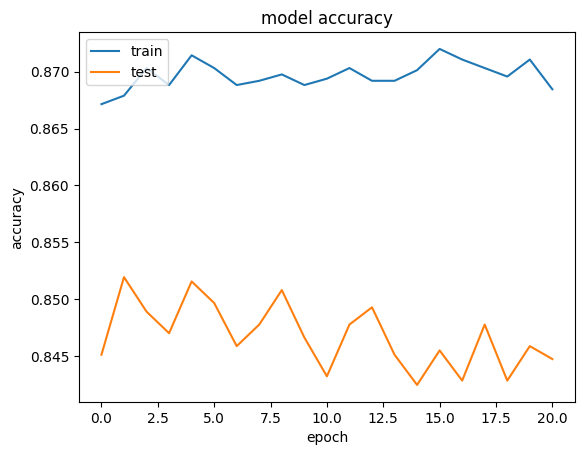

In [40]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


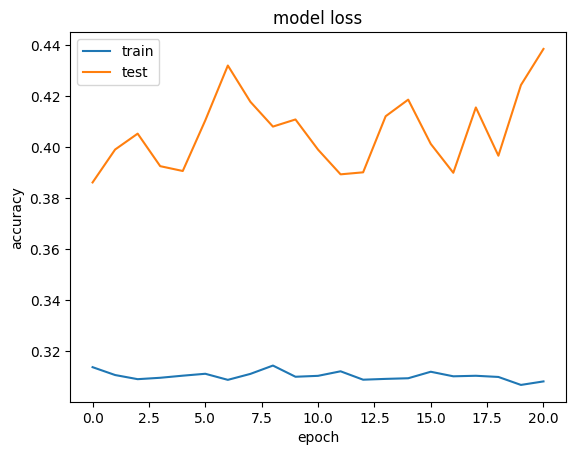

In [41]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [42]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1547,   48],
       [ 234,  171]])

In [44]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [45]:
score

0.859

In [ ]:
#get the weights

In [46]:
classifier.get_weights()

[array([[-1.6833407 , -0.02098555,  0.8697532 , -0.25497642,  1.2730249 ,
          1.1109236 ,  2.5806675 ,  1.1757569 ,  0.04513955, -0.60103905,
          1.3725469 ],
        [-2.6592972 , -4.010235  , -0.3676492 ,  1.6356903 , -2.7378876 ,
         -5.057703  ,  1.6197833 , -7.512319  , -1.0327717 ,  2.2871935 ,
         -4.1939044 ],
        [ 0.44154286, -1.3585755 ,  0.81264216, -1.6590511 ,  0.709264  ,
          2.4127712 ,  3.2290823 , -1.3046638 , -0.29096952, -1.160305  ,
          1.5004412 ],
        [ 1.127772  ,  0.49045914,  5.641196  ,  4.9633427 , -1.4112765 ,
          1.912795  , -2.7529216 , -0.54758734, -0.72461057, -0.10376939,
         -1.784963  ],
        [ 4.2322917 , -1.2057624 ,  1.0284964 ,  4.462862  ,  1.6618364 ,
         -1.699026  ,  5.355603  , -0.72116286, -7.14534   ,  0.00794353,
         -2.0262115 ],
        [ 1.6678045 ,  0.52537286,  0.91552025, -0.8319385 , -2.224096  ,
          0.7540182 ,  0.16102476, -1.1967356 , -0.31689307, -0.6871236